## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID" )
merge_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.
df = merge_df
df['Mouse ID'].nunique()

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_df = df[df.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
dup_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df.loc[df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_drug = clean_df.groupby('Drug Regimen')

td_mean = tumor_volume_drug['Tumor Volume (mm3)'].mean()
td_median = tumor_volume_drug['Tumor Volume (mm3)'].median()
td_variance = tumor_volume_drug['Tumor Volume (mm3)'].var()
td_standard = tumor_volume_drug['Tumor Volume (mm3)'].std()
td_sem = tumor_volume_drug['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tdf = pd.DataFrame({'Mean': td_mean, 'Median' : td_median, 'Variance' : td_variance, 'Standard':td_standard, 'SEM':td_sem})
                                      
tdf


,Mean,Median,Variance,Standard,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df4 = (clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
         .agg(['mean','median','std','sem'])
         .reset_index())
print (df4)
# Using the aggregation method, produce the same summary statistics in a single line


  Drug Regimen       mean     median       std       sem
0    Capomulin  40.675741  41.557809  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  6.268188  0.469821
2    Infubinol  52.884795  51.820584  6.567243  0.492236
3     Ketapril  55.235638  53.698743  8.279709  0.603860
4     Naftisol  54.331565  52.509285  8.134708  0.596466
5      Placebo  54.033581  52.288934  7.821003  0.581331
6     Propriva  52.320930  50.446266  6.622085  0.544332
7     Ramicane  40.216745  40.673236  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  6.966589  0.516398


## Bar and Pie Charts

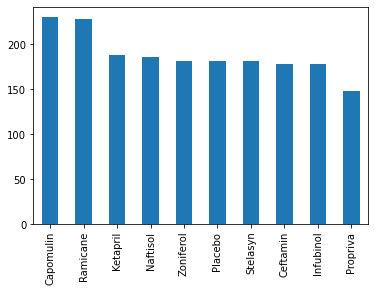

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_df = clean_df['Drug Regimen'].value_counts()
ax = drug_df.plot.bar()

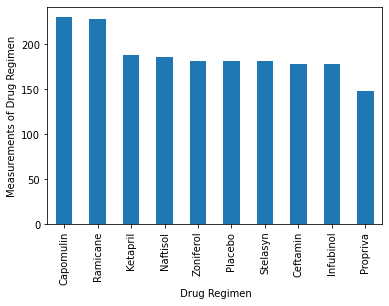

In [46]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

  
# Creating plot 
drug_df.plot(x = 'Drug Regimen', y='Measurements of each Regimen', kind = 'bar')
plt.ylabel('Measurements of Drug Regimen')
plt.xlabel(' Drug Regimen')

# show plot 
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x19ccbaafbe0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

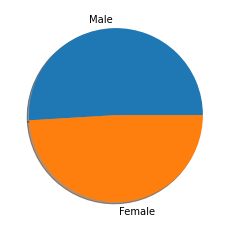

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ['Male', 'Female']
gender_type = clean_df['Sex'].value_counts()
print(gender_type)

plt.pie(gender_type, labels=labels, shadow=True)

#px = drug_df.plot.pie(subplots=True)

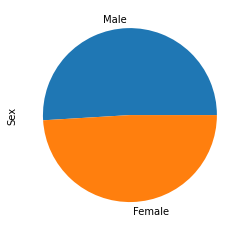

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = gender_type.plot(kind='pie')

plt.show()


In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
tp_max = clean_df.groupby('Mouse ID')['Timepoint'].max()
tp_max

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_reg = (df['Drug Regimen']=='Capomulin')& (df['Drug Regimen']=='Ramicane')&(df['Drug Regimen']=='Infubinol')& (df['Drug Regimen']=='Ceftamin')
# Start by getting the last (greatest) timepoint for each mouse
time_slot = drug_reg['Timepoint']
quartiles = time_slot.quantile()
lowerq = quantiles[0]
upperq = quantiles[45]
print(f"The lower quartile of Timepoint is: {lowerq}")
print(f"The upper quartile of Timepoint is: {upperq}")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


KeyError: 'Timepoint'

In [107]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments=["Capomulin", "Ramicane", "ketapril", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_treatments:   
    tumor_drug = df.loc[df["Drug Regimen"]==drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(tumor_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_drug.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    iqr=upper_q-lower_q
    lower_bound=lower_q - (1.5*iqr)
    upper_bound=upper_q + (1.5*iqr)
    outliers = tumor_drug.loc[(tumor_drug<lower_bound)| (tumor_drug>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
ketapril's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#cap_reg =df.loc[((df['Drug Regimen']=='Capomulin') & (df['Drug Regimen']=='Ramicane') & (df['Drug Regimen']=='ketapril') & (df['Drug Regimen']=='Naftisol'))]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


## Line and Scatter Plots

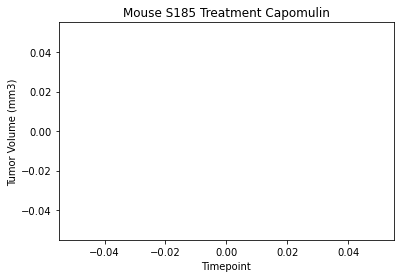

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_reg = df.loc[df['Drug Regimen'] == 'Capomulin']
mice_reg = cap_reg.loc[cap_reg['Mouse ID']=='S185']

plt.plot(mice_reg['Timepoint'],mice_reg['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse S185 Treatment Capomulin')
plt.show()

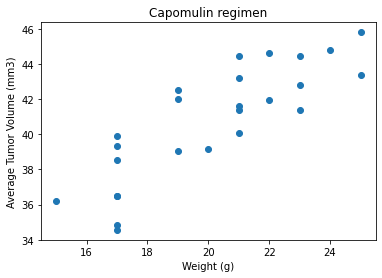

In [120]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average=cap_reg.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'], average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin regimen')
plt.show()


## Correlation and Regression

Correlation between weight and average tumor volume is 0.84


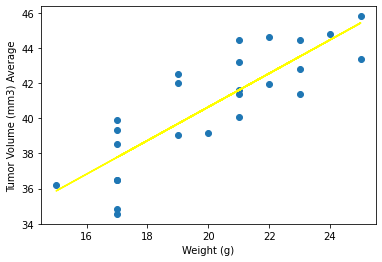

In [131]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average['Weight (g)'], average['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between weight and average tumor volume is {correlation}")
model=st.linregress(average['Weight (g)'], average['Tumor Volume (mm3)'])
y_values=average['Weight (g)']*model[0]+model[1]
x_values=average['Weight (g)']
plt.scatter(x_values, average['Tumor Volume (mm3)'])
plt.plot(x_values, y_values, color="yellow")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3) Average')
plt.show()